In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
car=pd.read_csv('/content/car_data.csv')
car.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
list(car)

['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased']

In [4]:
# Encode categorical variable 'Gender'
labelencoder = LabelEncoder()
car['Gender'] = labelencoder.fit_transform(car['Gender'])

In [5]:
# Define the features and the target variable
X = car[['Gender', 'Age', 'AnnualSalary']]
y = car['Purchased']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Logistic Regression Analysis**

In [8]:
# Initialize and train the logistic regression model
logistic_regressor = LogisticRegression(random_state=0)
logistic_regressor.fit(X_train, y_train)

LogisticRegression(random_state=0)

Validate Assumptions and Evaluate with Confusion Matrix and ROC Curve

Confusion Matrix:
[[139  13]
 [ 25  73]]


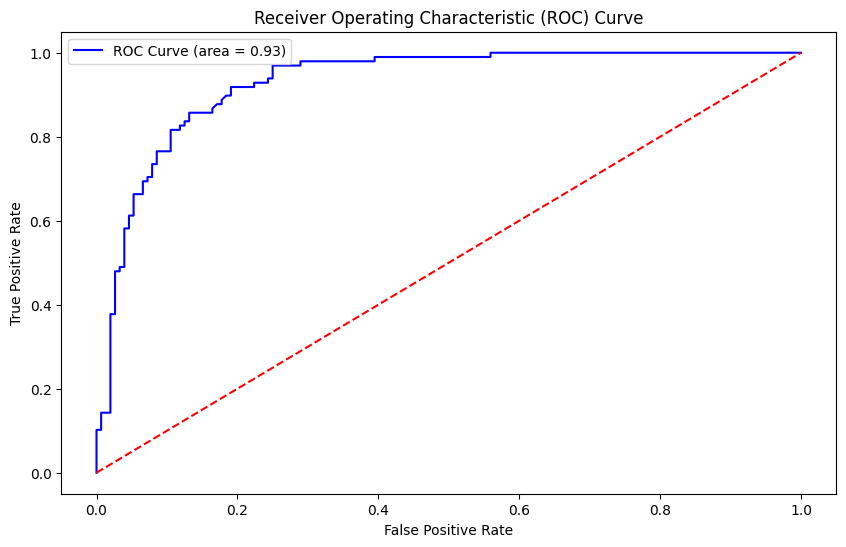

Area Under Curve (AUC): 0.9299812030075187
Accuracy: 0.848
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.91      0.88       152
     Class 1       0.85      0.74      0.79        98

    accuracy                           0.85       250
   macro avg       0.85      0.83      0.84       250
weighted avg       0.85      0.85      0.85       250



In [11]:

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the test set results
y_pred = logistic_regressor.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# ROC Curve and AUC
y_prob = logistic_regressor.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print AUC
print('Area Under Curve (AUC):', roc_auc)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print('Classification Report:')
print(report)


#Confusion Matrix Analysis:

* The model has a high number of true negatives and true positives, indicating good performance.
* The false positives and false negatives are relatively low, meaning the model makes fewer errors in predicting both classes.

#Accuracy: 0.848
This means that the model correctly predicted the purchase status for 84.8% of the test instances.

#Area Under Curve (AUC): 0.9299812030075187
The AUC of 0.93 is very high, suggesting that the model is excellent at distinguishing between those who will purchase and those who won't.

#**Decision Tree Analysis**

Confusion Matrix (Decision Tree):
[[140  12]
 [ 19  79]]


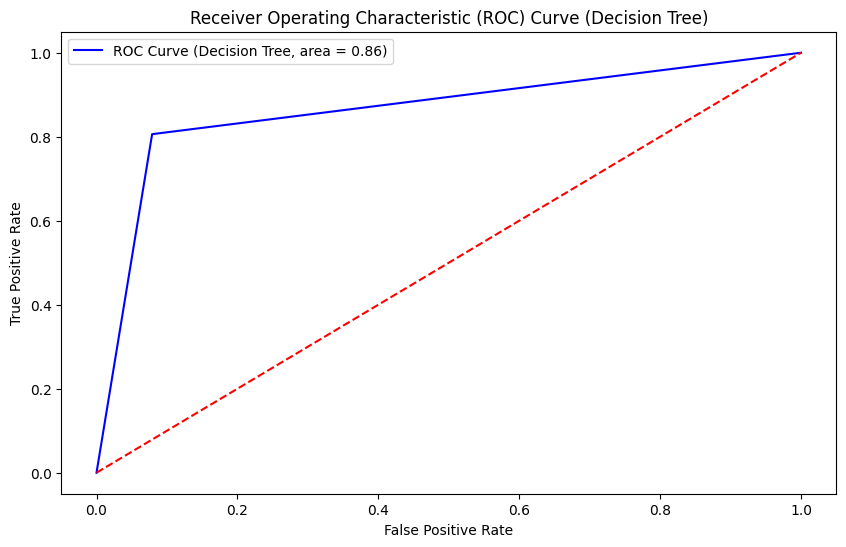

Area Under Curve (AUC) for Decision Tree: 0.8635875402792696
Accuracy (Decision Tree): 0.876
Classification Report (Decision Tree):
              precision    recall  f1-score   support

     Class 0       0.88      0.92      0.90       152
     Class 1       0.87      0.81      0.84        98

    accuracy                           0.88       250
   macro avg       0.87      0.86      0.87       250
weighted avg       0.88      0.88      0.88       250



In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize and train the decision tree model
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

# Predict the test set results
y_pred_tree = decision_tree.predict(X_test)

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
print('Confusion Matrix (Decision Tree):')
print(cm_tree)

# ROC Curve and AUC for Decision Tree
y_prob_tree = decision_tree.predict_proba(X_test)[:,1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

# Plot ROC Curve for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', label='ROC Curve (Decision Tree, area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
plt.legend()
plt.show()

# Print AUC for Decision Tree
print('Area Under Curve (AUC) for Decision Tree:', roc_auc_tree)

# Print accuracy for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print('Accuracy (Decision Tree):', accuracy_tree)

# Print classification report for Decision Tree
report_tree = classification_report(y_test, y_pred_tree, target_names=['Class 0', 'Class 1'])
print('Classification Report (Decision Tree):')
print(report_tree)

#Confusion Matrix Analysis:

* The decision tree model has a high number of true negatives and true positives, indicating good performance.
* The false positives and false negatives are relatively low, meaning the model makes fewer errors in predicting both classes.

#Accuracy: 0.876
This means that the decision tree model correctly predicted the purchase status for 87.6% of the test instances.

# Area Under Curve (AUC): 0.8635875402792696
Indicates good discrimination ability to distinguish between the classes.